In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
import sklearn
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [4]:
merge_data = pd.read_csv('../Data/Updated Data_V1.csv')

In [5]:
merge_data.head()

,Unnamed: 0,articleID,label,headline_v4,headline_postag,headline_stem
0,0,1,0,মুরগির হামলায় শেয়াল নিহত,মুরগির/NC হামলায়/NC শেয়াল/NC নিহত/JJ,মুগি হামলা শেয়াল নিহত
1,1,2,0,বিটিভিতে যেবার ইন্টারভিউ গেলাম,বিটিভিতে/NC যেবার/NV ইন্টারভিউ/NC গেলাম/VM,বিটিভিতে যেবা ইন্টারভিউ গে
2,2,3,0,বিদেশ উন্নতমানের বিরোধীদল আমদানি পরামর্শ অনলাই...,বিদেশ/NC উন্নতমানের/NC বিরোধীদল/NC আমদানি/NC প...,বিদেশ উন্নতমান বিরোধী আমদানি পরামর্শ অনলাইন রা...
3,3,4,0,অবসর নেয়ার ঘোষণা মেসি,অবসর/NC নেয়ার/NC ঘোষণা/NC মেসি/NP,অবস নেয়া ঘোষণা মেসি
4,4,5,0,মাদারফাকার নহে ব্রাদারফাকার সাকা দৈনিক মতিকণ্ঠ,মাদারফাকার/NC নহে/VM ব্রাদারফাকার/NC সাকা/NC দ...,মাদাফাকা নহে ব্াদাফাকা সাকা দৈন মতিকণ্ঠ


In [6]:
merge_data.drop('Unnamed: 0',inplace=True,axis = 1)

In [7]:
merge_data.head(3)

,articleID,label,headline_v4,headline_postag,headline_stem
0,1,0,মুরগির হামলায় শেয়াল নিহত,মুরগির/NC হামলায়/NC শেয়াল/NC নিহত/JJ,মুগি হামলা শেয়াল নিহত
1,2,0,বিটিভিতে যেবার ইন্টারভিউ গেলাম,বিটিভিতে/NC যেবার/NV ইন্টারভিউ/NC গেলাম/VM,বিটিভিতে যেবা ইন্টারভিউ গে
2,3,0,বিদেশ উন্নতমানের বিরোধীদল আমদানি পরামর্শ অনলাই...,বিদেশ/NC উন্নতমানের/NC বিরোধীদল/NC আমদানি/NC প...,বিদেশ উন্নতমান বিরোধী আমদানি পরামর্শ অনলাইন রা...


In [8]:
from bltk.langtools import Tokenizer
tokenizer = Tokenizer()
merge_data['word2vec'] = [tokenizer.word_tokenizer(i) for i in merge_data['headline_v4']] 

In [9]:
merge_data.head(3)

,articleID,label,headline_v4,headline_postag,headline_stem,word2vec
0,1,0,মুরগির হামলায় শেয়াল নিহত,মুরগির/NC হামলায়/NC শেয়াল/NC নিহত/JJ,মুগি হামলা শেয়াল নিহত,"[মুরগির, হামলায়, শেয়াল, নিহত]"
1,2,0,বিটিভিতে যেবার ইন্টারভিউ গেলাম,বিটিভিতে/NC যেবার/NV ইন্টারভিউ/NC গেলাম/VM,বিটিভিতে যেবা ইন্টারভিউ গে,"[বিটিভিতে, যেবার, ইন্টারভিউ, গেলাম]"
2,3,0,বিদেশ উন্নতমানের বিরোধীদল আমদানি পরামর্শ অনলাই...,বিদেশ/NC উন্নতমানের/NC বিরোধীদল/NC আমদানি/NC প...,বিদেশ উন্নতমান বিরোধী আমদানি পরামর্শ অনলাইন রা...,"[বিদেশ, উন্নতমানের, বিরোধীদল, আমদানি, পরামর্শ,..."


In [10]:
#Train a Word2Vec model using Gensim
import gensim
Min_count=1      #It will ignore all the words with a total frequency lower than this
Size = 200      #It tells the dimensionality of the word vectors
Workers=4        #These are the threads to train the model
Window=5         #Maximum distance between the current and predicted word within a sentence
#train word2vec model
model = gensim.models.Word2Vec(sentences = merge_data['word2vec'], size = Size,window=Window, workers = Workers, min_count = Min_count,sg=1)
#Vocabulary size
words = list(model.wv.vocab)
print('Here is the Vocabulary Size.. %d' % len(words))

Here is the Vocabulary Size.. 32682


In [11]:
#first 10 words
words[1:10]

['হামলায়',
 'শেয়াল',
 'নিহত',
 'বিটিভিতে',
 'যেবার',
 'ইন্টারভিউ',
 'গেলাম',
 'বিদেশ',
 'উন্নতমানের']

In [12]:
# This will print the most similar words  present in the model
model.most_similar("বিদেশ")

<ipython-input-12-16459fa6222d>:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar("বিদেশ")


[('নিরস্ত্রীকরণে', 0.9918087720870972),
 ('মোড়ক', 0.9899786710739136),
 ('সীমায়', 0.9896761178970337),
 ('বিকৃতি', 0.98921138048172),
 ('প্রিয়তি', 0.9889733791351318),
 ('কথামতো', 0.9884722828865051),
 ('শান্তির', 0.9883442521095276),
 ('হিসাবের', 0.9874988198280334),
 ('মাত্রা', 0.9870990514755249),
 ('কিলিং', 0.9868845343589783)]

In [13]:
# Importing bokeh libraries for showing how words of similar context are grouped together
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook
import matplotlib.pyplot as plt

voc_size=3000
#Defining the chart
output_notebook()
plot_chart = bp.figure(plot_width=700, plot_height=600, title="A map/plot of 3000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover",
    x_axis_type=None, y_axis_type=None, min_border=1)

#Extracting the list of word vectors, limiting to 1000, each is of 200 dimensions
word_vectors = [model[w] for w in list(model.wv.vocab.keys())[:voc_size]]

# Reducing dimensionality by converting the vectors to 2d vectors
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

# Storing data in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = list(model.wv.vocab.keys())[:voc_size]

# Corresponding word appears when you hover on the data point.
plot_chart.scatter(x='x', y='y', source=tsne_df)
hover = plot_chart.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_chart)

Loading BokehJS ...

<ipython-input-13-77f5de125a85>:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  word_vectors = [model[w] for w in list(model.wv.vocab.keys())[:voc_size]]


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.102s...
[t-SNE] Computed neighbors for 3000 samples in 2.127s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 0.033511
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.791710
[t-SNE] KL divergence after 1000 iterations: 1.124053


In [13]:
"""import numpy as np
embedding_matrix = np.zeros((len(model.wv.vocab) + 1, 200))
for i, vec in enumerate(model.wv.vectors):
    embedding_matrix[i] = vec"""
import numpy as np 
#Build word vector set by using the average value of all word vectors , then scale
def buildWordVector(text, size):
    vec = np.zeros(size).reshape((1, size)) #As word vectors are of zero length size value(i.e 300) 
    count = 0 # no. of words with a valid vector in the sentence/review
    for word in text: #for each word in a sentence/review
        try:
            vec += model[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [14]:
from sklearn.preprocessing import scale
vecs = np.concatenate([buildWordVector(z, Size) for z in merge_data['word2vec']])
#print("Before Scaling:",vecs[1:2])
vecs = scale(vecs)
#print("After Scaling:",vecs[1:2])

<ipython-input-13-acbd0a0fedca>:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec += model[word].reshape((1, size))


In [20]:
vecs.shape

(57115, 200)

In [21]:
vecs

array([[ 0.31922373, -0.81399353, -1.13446164, ...,  1.1364535 ,
        -1.49444397, -0.73950132],
       [-0.26139521,  0.94120552,  0.66226991, ..., -1.25871938,
         0.23441854,  1.77568913],
       [-0.0195222 ,  0.52989597,  0.45726425, ..., -0.45982026,
         0.35772008,  0.87948914],
       ...,
       [-0.39619087,  1.1777105 ,  0.20222014, ...,  0.77750103,
        -0.06724383, -0.1227206 ],
       [ 0.18242635,  0.12110408,  0.49928044, ...,  0.02305382,
         0.50017515,  0.307762  ],
       [ 0.13085752,  0.24958848, -1.23967057, ...,  1.11267111,
        -1.75182288, -0.62102624]])

In [17]:
import sklearn
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

In [18]:
from openTSNE import TSNE

tsne_model_v2 = tsne = TSNE(
    n_components=2, perplexity=30, learning_rate=200,
    n_jobs=4, initialization="pca", metric="euclidean",
    early_exaggeration_iter=250, early_exaggeration=12, n_iter=750,
    neighbors="exact", negative_gradient_method="bh")

vecs_v1 = tsne_model_v2.fit(vecs)

In [19]:
vecs_v1.shape

(57115, 2)

In [22]:
Y_word2vec = merge_data['label']

In [23]:
smk_tiagram = SMOTETomek(random_state=42)
X_vec_v1,Y_vec_v1=smk_tiagram.fit_sample(vecs_v1,Y_word2vec)

In [24]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y_word2vec)))
print('Resampled dataset shape {}'.format(Counter(Y_vec_v1)))

Original dataset shape Counter({1: 52588, 0: 4527})
Resampled dataset shape Counter({0: 47714, 1: 47714})


In [25]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(X_vec_v1,Y_vec_v1,test_size = 0.30, random_state= True)

In [34]:
# Decission Tree Classifier
decession_tree = DecisionTreeClassifier()
decession_tree.fit(x_train,y_train)
y_pred_decession_tree = decession_tree.predict(x_test)
print("Decission Tree Classifier")
print(classification_report(y_test, y_pred_decession_tree))

# Random Forest  Classifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)
y_pred_random_forest = random_forest.predict(x_test)
print("Random Forest  Classifier")
print(classification_report(y_test, y_pred_random_forest))


# KNN  Algo
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)
y_pred_knn_classifier = knn_classifier.predict(x_test)
print("KNN  Algo")
print(classification_report(y_test, y_pred_knn_classifier))


# Multinomial Naive Bias
mulNB = GaussianNB()
mulNB.fit(x_train,y_train)
y_pred_mulNB = mulNB.predict(x_test)
print("Gaussian Naive Bias")
print(classification_report(y_test, y_pred_mulNB))


Decission Tree Classifier
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     14239
           1       0.81      0.80      0.81     14390

    accuracy                           0.81     28629
   macro avg       0.81      0.81      0.81     28629
weighted avg       0.81      0.81      0.81     28629

Random Forest  Classifier
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     14239
           1       0.84      0.82      0.83     14390

    accuracy                           0.83     28629
   macro avg       0.83      0.83      0.83     28629
weighted avg       0.83      0.83      0.83     28629

KNN  Algo
              precision    recall  f1-score   support

           0       0.77      0.86      0.81     14239
           1       0.84      0.75      0.79     14390

    accuracy                           0.80     28629
   macro avg       0.80      0.80      0.80     28629
weighted avg

In [27]:
# Gradient bossting
gradient_bossting = GradientBoostingClassifier(random_state=3)
gradient_bossting.fit(x_train,y_train)
y_pred_gradientbossting = gradient_bossting.predict(x_test)
print("GradientBosting  Algo")
print(classification_report(y_test, y_pred_gradientbossting))


# SVM
svm_class = svm.SVC(kernel='poly')
svm_class.fit(x_train,y_train)
y_pred_svm = svm_class.predict(x_test)
print("SVM  Algo")
print(classification_report(y_test, y_pred_svm))


# Logistic Regressor
logis_reg =LogisticRegression()
logis_reg.fit(x_train,y_train)
y_pred_log = logis_reg.predict(x_test)
print("Logistic Reg  Algo")
print(classification_report(y_test, y_pred_log))

GradientBosting  Algo
              precision    recall  f1-score   support

           0       0.61      0.59      0.60     14239
           1       0.61      0.63      0.62     14390

    accuracy                           0.61     28629
   macro avg       0.61      0.61      0.61     28629
weighted avg       0.61      0.61      0.61     28629

SVM  Algo
              precision    recall  f1-score   support

           0       0.53      0.74      0.62     14239
           1       0.57      0.34      0.43     14390

    accuracy                           0.54     28629
   macro avg       0.55      0.54      0.52     28629
weighted avg       0.55      0.54      0.52     28629

Logistic Reg  Algo
              precision    recall  f1-score   support

           0       0.55      0.57      0.56     14239
           1       0.56      0.53      0.54     14390

    accuracy                           0.55     28629
   macro avg       0.55      0.55      0.55     28629
weighted avg       0.55

In [30]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

<ipython-input-32-fb83b427d9e0>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-32-fb83b427d9e0>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-32-fb83b427d9e0>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-32-fb83b427d9e0>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-32-fb83b427d9e0>:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-32-fb83b427d9e0>:15: DeprecationWarning: scipy.interp i

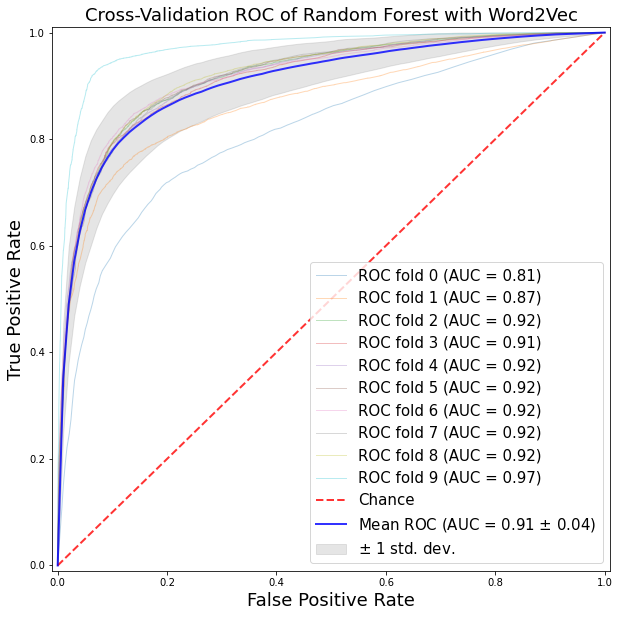

In [32]:
# Classification and ROC analysis
classifier2 = RandomForestClassifier()
cv = StratifiedKFold(n_splits=10)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_vec_v1, Y_vec_v1):
    probas_ = classifier2.fit(X_vec_v1[train], Y_vec_v1[train]).predict_proba(X_vec_v1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y_vec_v1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Random Forest with Word2Vec',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()